 Um labirinto é composto de $6$ salas numeradas como mostrado na Figura a seguir. Um gato é colocado na sala $5$ e lá permanece. Um rato é colocado na sala $0$ no instante $t=0$ e a cada hora o rato se cansa de permanecer na mesma sala e vai para uma das salas vizinhas com igual probabilidade. A decisão do rato independe do caminho que ele percorreu até então (note que o rato pode voltar para uma sala em que já esteve). Infelizmente, se o rato for para a sala $5$ não sairá mais.

 Calcular a probabilidade de o rato morrer após $3$ horas e o número médio de passos para a absorção.

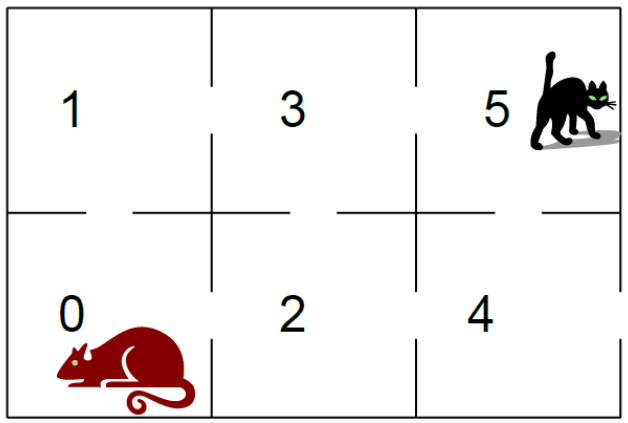

In [4]:
from IPython.display import display, Image
display(Image(filename='/content/GatoRato.png', height=200, embed=True))

In [5]:
import numpy as np

In [62]:
simulacoes = 100000   # Número de simulações

# Como há algumas casas que o rato pode percorrer até encontrar o gato e há
# probabilidade de transição entre mais de uma casa adjacente, a quantidade de
# passos até o estado absorvente pode ser relativamente alta. Por isso, será
# analisado até o passo 50 da Cadeia de Markov.

# Neste caso, considerando o rato morto 'após' 3 horas, ele pode chegar na sala
# com o gato em qualquer passo anterior.

tempoMorte = 3        # Instante em que o rato deve morrer.
tamanhoCadeia = 50    # Número de transições da cadeia de Markov.
passosAbsorcao = []   # Número de passos até chegar onde o gato está.
estadoAbsorvente = 5  # Casa em que o gato está;

cadeiaMarkov = np.zeros(simulacoes, int) # Estados no passo tempoMorte.
matrizTransicoes = np.array([[ 0,  1/2, 1/2,  0,   0,   0 ],
                             [1/2,  0,   0,  1/2,  0,   0 ],
                             [1/3,  0,   0,  1/3, 1/3,  0 ],
                             [ 0,  1/3, 1/3,  0,   0,  1/3],
                             [ 0,   0,  1/2,  0,   0,  1/2],
                             [ 0,   0,   0,   0,   0,   1 ]])

for simulacao in np.arange(1, (simulacoes + 1), 1):
  # A transição inicial do rato considera que ele foi colocado na casa 0 no
  # instante t = 0, logo posicaoInicial = [1, 0, 0, 0, 0, 0].
  cadeia_Markov = np.zeros(tamanhoCadeia, int)

  for passo in np.arange(1, tamanhoCadeia, 1):
    # Probabilidades de Transição para o estado atual da Cadeia de Markov:
    limiarTransicao = np.cumsum(matrizTransicoes[cadeia_Markov[passo - 1]])
    transicao = np.random.uniform(0, 1)

    # Decisão da próxima sala que o rato irá se mover.
    # Se chegar na sala onde está o gato, encerra a simulação atual.
    salaTransicao = np.argmax(limiarTransicao > transicao)
    cadeia_Markov[passo] = salaTransicao
    if salaTransicao == estadoAbsorvente:
      passosAbsorcao.append(passo)
      break

  # Não há possibilidade de o rato chegar na mesma sala do gato com um número de
  # passos menor que 3, logo não há condicional passos >= tempoMorte para o break.
  cadeiaMarkov[simulacao - 1] = cadeia_Markov[tempoMorte]

# Cálculo das Probabilidade por Monte Carlo:
probabilidade = np.sum(cadeiaMarkov == estadoAbsorvente)/simulacoes
print(f'A probabilidade de o rato morrer em {tempoMorte} horas é de {probabilidade:.2%}.')
print(f'Média de {np.mean(passosAbsorcao):.1f} passos para absorção.')


A probabilidade de o rato morrer em 3 horas é de 22.11%.
Média de 9.7 passos para absorção.
